In [2]:
import numpy as np
import plotly.graph_objects as go

# Fijamos la semilla para obtener resultados reproducibles
np.random.seed(0)

# Generamos los vectores aleatorios en R^3 con coordenadas entre -1 y 1
x1 = np.random.uniform(-1, 1, 3)
x2 = np.random.uniform(-1, 1, 3)
q  = np.random.uniform(-1, 1, 3)

print("x1:", x1)
print("x2:", x2)
print("q: ", q)

# Creamos la matriz A con x1 y x2 como columnas
A = np.column_stack((x1, x2))

# Calculamos la proyección de q sobre el span de x1 y x2:
# v = A (A^T A)^{-1} A^T q
ATA = A.T @ A
if np.linalg.det(ATA) != 0:
    lambdas = np.linalg.inv(ATA) @ (A.T @ q)
    v = A @ lambdas
else:
    print("Los vectores x1 y x2 no son linealmente independientes.")
    v = np.array([0, 0, 0])

print("v (proyección):", v)

# Calculamos el vector r = q - v
r = q - v
print("r = q - v:", r)

# Función para añadir un vector al gráfico
def add_vector(fig, vector, name, color):
    fig.add_trace(go.Scatter3d(
        x=[0, vector[0]], 
        y=[0, vector[1]], 
        z=[0, vector[2]],
        mode='lines+markers',
        marker=dict(size=4),
        line=dict(color=color, width=5),
        name=name
    ))

# Creamos la figura 3D
fig = go.Figure()

# Añadimos los vectores
add_vector(fig, x1, 'x1', 'blue')
add_vector(fig, x2, 'x2', 'green')
add_vector(fig, q, 'q', 'red')
add_vector(fig, v, 'v (proyección)', 'orange')
add_vector(fig, r, 'r = q - v', 'purple')

# Creamos una malla para graficar el span de x1 y x2
# Usamos parámetros alpha y beta
alpha = np.linspace(-1, 1, 10)
beta  = np.linspace(-1, 1, 10)
alpha, beta = np.meshgrid(alpha, beta)

# Cada punto del plano es: P = alpha * x1 + beta * x2
X = alpha * x1[0] + beta * x2[0]
Y = alpha * x1[1] + beta * x2[1]
Z = alpha * x1[2] + beta * x2[2]

# Añadimos la superficie del span (con cierta transparencia)
fig.add_trace(go.Surface(x=X, y=Y, z=Z, opacity=0.5, colorscale='Viridis', showscale=False, name='Span(x1, x2)'))

# Configuración final del gráfico
fig.update_layout(
    title="Proyección de q sobre el span de x1 y x2 y vector ortogonal r",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

fig.show()


x1: [0.09762701 0.43037873 0.20552675]
x2: [ 0.08976637 -0.1526904   0.29178823]
q:  [-0.12482558  0.783546    0.92732552]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.v (proyección): [0.31361322 0.75550969 0.77777208]
r = q - v: [-0.43843879  0.02803632  0.14955344]



Coeficientes estimados (Python):Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
a (intercepto): 3.846370518808172
b (pendiente): 1.8588377507009843

Estos resultados deberían coincidir con los obtenidos en Excel usando LINEST.

Verificación de ortogonalidad del vector error:
Producto escalar (error_vector · [1,1,...,1]): 1.9806378759312793e-13
Producto escalar (error_vector · x): -3.872457909892546e-13

Los productos escalares deben ser 0 (o muy cercanos a 0) para confirmar la ortogonalidad.



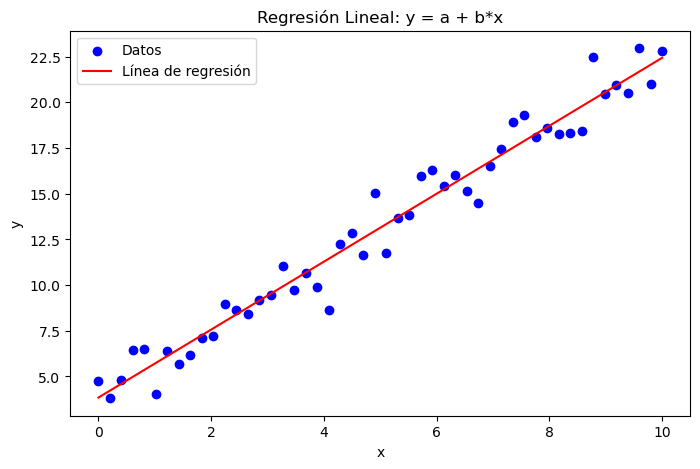

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar datos sintéticos
np.random.seed(0)          # Para reproducibilidad
n = 50                     # Número de datos
x = np.linspace(0, 10, n)  # Valores de x en el intervalo [0, 10]

# Parámetros verdaderos
a_true = 3   # intercepto verdadero
b_true = 2   # pendiente verdadera

# Vector error: e ~ N(0,1)
error = np.random.normal(0, 1, n)

# Generamos la variable dependiente y
y = a_true + b_true * x + error

# 2. Resolver la regresión lineal con las ecuaciones normales
# Construimos la matriz de diseño X (columna de 1's y columna de x)
X = np.column_stack((np.ones(n), x))

# Solución de las ecuaciones normales:
# beta_hat = (X^T X)^{-1} X^T y
beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
a_est, b_est = beta_hat  # Intercepto y pendiente estimados

print("Coeficientes estimados (Python):")
print("a (intercepto):", a_est)
print("b (pendiente):", b_est)
print("\nEstos resultados deberían coincidir con los obtenidos en Excel usando LINEST.")

# 3. Calcular el vector de error y verificar ortogonalidad
# Cálculo de la recta de regresión estimada
y_est = X @ beta_hat

# Vector error: e = y - y_est
error_vector = y - y_est

# Verificar ortogonalidad:
# Producto escalar del error con el vector de unos (columna de 1's)
dot_with_ones = np.dot(error_vector, np.ones(n))
# Producto escalar del error con la variable x
dot_with_x = np.dot(error_vector, x)

print("\nVerificación de ortogonalidad del vector error:")
print("Producto escalar (error_vector · [1,1,...,1]):", dot_with_ones)
print("Producto escalar (error_vector · x):", dot_with_x)
print("\nLos productos escalares deben ser 0 (o muy cercanos a 0) para confirmar la ortogonalidad.")

# 4. (Opcional) Graficar datos y la línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_est, color='red', label='Línea de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal: y = a + b*x')
plt.legend()
plt.show()
